# Imports

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from itertools import chain
tf.logging.set_verbosity(tf.logging.WARN)


# Data analyze
## Data statics from readme.txt

  2113 users
  
  10197 movies
   
  

### Genres
20 movie genres
  
20809 movie genre assignments
   
avg. 2.040 genres per movie

 ### Director actor
 4060 directors
 
 95321 actors
 
 avg. 22.778 actors per movie
 
 72 countries


### Country location
10197 country assignments

avg. 1.000 countries per movie

47899 location assignments

avg. 5.350 locations per movie


### Tags
13222 tags

47957 tag assignments (tas), i.e. tuples [user, tag, movie]

avg. 22.696 tas per user

avg. 8.117 tas per movie



  ### Ratings
  855598 ratings
  
  avg. 404.921 ratings per user
  
  avg. 84.637 ratings per movie

## Data content of files
First lets print all columns of each data file and first 5 rows for better understating content of files.

In [2]:
files = os.listdir('data')
print(files)
print('-'*50)
for file_name in files: 
    with open('data/'+file_name, encoding = "ISO-8859-1") as f:
        print(file_name)
        df = pd.read_csv(f,sep='\t')
        print(df.columns)
        print(df.head(5))
        print('-'*50)

['user_ratedmovies.dat', 'tags.dat', 'movie_directors.dat', 'movie_genres.dat', 'movie_tags.dat', 'movies.dat', 'user_taggedmovies-timestamps.dat', 'movie_locations.dat', 'user_taggedmovies.dat', 'movie_actors.dat', 'user_ratedmovies-timestamps.dat', 'movie_countries.dat']
--------------------------------------------------
user_ratedmovies.dat
Index(['userID', 'movieID', 'rating', 'date_day', 'date_month', 'date_year',
       'date_hour', 'date_minute', 'date_second'],
      dtype='object')
   userID  movieID  rating  date_day  date_month  date_year  date_hour  \
0      75        3     1.0        29          10       2006         23   
1      75       32     4.5        29          10       2006         23   
2      75      110     4.0        29          10       2006         23   
3      75      160     2.0        29          10       2006         23   
4      75      163     4.0        29          10       2006         23   

   date_minute  date_second  
0           17           16  

Index(['userID', 'movieID', 'rating', 'timestamp'], dtype='object')
   userID  movieID  rating      timestamp
0      75        3     1.0  1162160236000
1      75       32     4.5  1162160624000
2      75      110     4.0  1162161008000
3      75      160     2.0  1162160212000
4      75      163     4.0  1162160970000
--------------------------------------------------
movie_countries.dat
Index(['movieID', 'country'], dtype='object')
   movieID country
0        1     USA
1        2     USA
2        3     USA
3        4     USA
4        5     USA
--------------------------------------------------


## Analyze of user_ratedmovies.dat
These files contain the ratings of the movies provided by each particular user.
        They also contain the timestamps when the ratings were provided.



In [3]:
user_ratedmovies_files = 'data/user_ratedmovies.dat'
df_user_ratedmovies = pd.read_csv(open(user_ratedmovies_files, encoding="ISO-8859-1"), sep='\t')
df_user_ratedmovies.head()

userID  movieID  rating  date_day  date_month  date_year  date_hour  \
0      75        3     1.0        29          10       2006         23   
1      75       32     4.5        29          10       2006         23   
2      75      110     4.0        29          10       2006         23   
3      75      160     2.0        29          10       2006         23   
4      75      163     4.0        29          10       2006         23   

   date_minute  date_second  
0           17           16  
1           23           44  
2           30            8  
3           16           52  
4           29           30

Number of rows 855598
----------------------------------------
minimal rating: 0.5 
maximal rating 5.0
rating values [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
have missing rating value:  False
----------------------------------------
unique userID 2113
unique movieID 10109
Not all users rated all movies
----------------------------------------


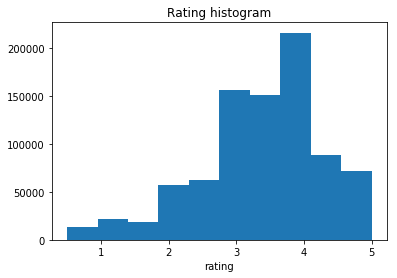

In [4]:
plt.hist(df_user_ratedmovies['rating'])
plt.xlabel('rating')
plt.title('Rating histogram')
print('Number of rows', len(df_user_ratedmovies))
print('-'*40)
min_rate = df_user_ratedmovies['rating'].min()
max_rate = df_user_ratedmovies['rating'].max()
print('minimal rating:',min_rate,'\nmaximal rating', max_rate)
print('rating values', sorted(df_user_ratedmovies['rating'].unique()))
print('have missing rating value: ',np.any(df_user_ratedmovies['rating'].isnull()))
print('-'*40)
unique_users = sorted(df_user_ratedmovies['userID'].unique())
unique_movies = sorted(df_user_ratedmovies['movieID'].unique())
print('unique userID', len(unique_users))
print('unique movieID', len(unique_movies))
#Checking if each movie is rated by each user.
all_users = True
for movie_id in unique_movies:
    user_rated_movie = sorted(df_user_ratedmovies[df_user_ratedmovies['movieID'] == movie_id]['userID'].unique())
    if user_rated_movie != unique_users:
        all_users = False
        break
print('All users rated all movies') if all_users else print('Not all users rated all movies')
print('-'*40)


## Analyze of tags
This file contains the set of tags available in the dataset.
There are 13222 unique tags

In [5]:
tags_file = "data/tags.dat"
df_tags = pd.read_csv(open(tags_file, encoding="ISO-8859-1"), sep='\t')
df_tags.head()

id    value
0   1    earth
1   2   police
2   3   boxing
3   4  painter
4   5    whale

In [6]:
print('Number of unique tags', len(df_tags['value']))

Number of unique tags 13222


## Analyze of movie_tags 
 This file contains the tags assigned to the movies, and the number of times 
        the tags were assigned to each movie.
       
Not all tags were used.

In [7]:
movie_tags_file = 'data/movie_tags.dat'
df_movie_tags = pd.read_csv(open(movie_tags_file, encoding="ISO-8859-1"), sep='\t')
df_movie_tags.head()

movieID  tagID  tagWeight
0        1      7          1
1        1     13          3
2        1     25          3
3        1     55          3
4        1     60          1

In [8]:
print('Maximal tagWeight',np.max(df_movie_tags['tagWeight']))
print('Minimal tagWeight',np.min(df_movie_tags['tagWeight']))
print('Type of tagWeight',df_movie_tags['tagWeight'].dtype)
print('Number of unique tagID',len(df_movie_tags['tagID'].unique()))

Maximal tagWeight 42
Minimal tagWeight 1
Type of tagWeight int64
Number of unique tagID 5297


# Analyze of movie_genres
 This file contains the genres of the movies. All movies have at least one genre
 

In [9]:
movie_genere_file = 'data/movie_genres.dat'
df_movie_genre = pd.read_csv(open(movie_genere_file, encoding="ISO-8859-1"), sep='\t')
df_movie_genre.head()

movieID      genre
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

In [10]:
print('Unique genere values',df_movie_genre['genre'].nunique())
print('Unique movies that have genre', df_movie_genre['movieID'].nunique())
df_movie_genre_by_movie = df_movie_genre.groupby('movieID')
print('Miniamal number of movie\' generes', df_movie_genre_by_movie.count().min()[0])
print('Maximal number of movie\' generes', df_movie_genre_by_movie.count().max()[0])
movie_unique_genre_list = sorted(df_movie_genre['genre'].unique())

Unique genere values 20
Unique movies that have genre 10197
Miniamal number of movie' generes 1
Maximal number of movie' generes 8


## Analyze of movies.dat
This file contains information about the movies of the database.


In [11]:
movie_file = 'data/movies.dat'
df_movie = pd.read_csv(open(movie_file, encoding="ISO-8859-1"), sep='\t')

df_movie.head()

id                        title  imdbID  \
0   1                    Toy story  114709   
1   2                      Jumanji  113497   
2   3               Grumpy Old Men  107050   
3   4            Waiting to Exhale  114885   
4   5  Father of the Bride Part II  113041   

                                        spanishTitle  \
0                               Toy story (juguetes)   
1                                            Jumanji   
2                                Dos viejos gruñones   
3                               Esperando un respiro   
4  Vuelve el padre de la novia (Ahora también abu...   

                                      imdbPictureURL  year  \
0  http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...  1995   
1  http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...  1995   
2  http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...  1993   
3  http://ia.media-imdb.com/images/M/MV5BMTczMTMy...  1995   
4  http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...  1995   

                          rtID rtAllCriticsRating rtAllCriticsNumReviews  \
0                    toy_story                  9                     73   
1              1068044-jumanji                5.6                     28   
2               grumpy_old_men                5.9                     36   
3            waiting_to_exhale                5.6                     25   
4  father_of_the_bride_part_ii                5.3                     19   

  rtAllCriticsNumFresh                        ...                          \
0                   73                        ...                           
1                   13                        ...                           
2                   24                        ...                           
3                   14                        ...                           
4                    9                        ...                           

  rtAllCriticsScore rtTopCriticsRating rtTopCriticsNumReviews  \
0               100                8.5                     17   
1                46                5.8                      5   
2                66                  7                      6   
3                56                5.5                     11   
4                47                5.4                      5   

  rtTopCriticsNumFresh rtTopCriticsNumRotten rtTopCriticsScore  \
0                   17                     0               100   
1                    2                     3                40   
2                    5                     1                83   
3                    5                     6                45   
4                    1                     4                20   

  rtAudienceRating rtAudienceNumRatings rtAudienceScore  \
0              3.7               102338              81   
1              3.2                44587              61   
2              3.2                10489              66   
3              3.3                 5666              79   
4                3                13761              64   

                                        rtPictureURL  
0  http://content7.flixster.com/movie/10/93/63/10...  
1  http://content8.flixster.com/movie/56/79/73/56...  
2  http://content6.flixster.com/movie/25/60/25602...  
3  http://content9.flixster.com/movie/10/94/17/10...  
4  http://content8.flixster.com/movie/25/54/25542...  

[5 rows x 21 columns]

## Analze of movie_directors

This file contains the directors of the movies.

In [12]:
movie_directors_file = 'data/movie_directors.dat'
df_movie_director = pd.read_csv(open(movie_directors_file,encoding="ISO-8859-1"), sep='\t')
movie_directors_list = df_movie_director['directorID'].unique()
df_movie_director.head()

movieID       directorID     directorName
0        1    john_lasseter    John Lasseter
1        2     joe_johnston     Joe Johnston
2        3    donald_petrie    Donald Petrie
3        4  forest_whitaker  Forest Whitaker
4        5    charles_shyer    Charles Shyer

# Data preprocessing
In my model I will not use information about dircetor, actors, locations, countries. 

First thing we need to do is to filter only this users that rated any movie. In the next step we will drop all movies that were not rated

In [13]:
active_users = set(df_user_ratedmovies['userID'].unique())
rated_movies = set(df_user_ratedmovies['movieID'].unique())

In [14]:
df_movie_tags = df_movie_tags[df_movie_tags['movieID'].apply(lambda x: x in rated_movies)]
df_movie = df_movie[df_movie['id'].apply(lambda x: x in rated_movies)]
df_movie_genre = df_movie_genre[df_movie_genre['movieID'].apply(lambda x: x in rated_movies)]


Lests change user_id to by in set [0, Number of users]. In the similar way i will change movieID.

In [15]:
user_id_map = dict((old_id, new_id) for new_id, old_id in enumerate(sorted(df_user_ratedmovies['userID'].unique())))
movie_id_map = dict((old_id, new_id) for new_id, old_id in enumerate(sorted(df_movie['id'].unique())))


In [16]:
#users
df_user_ratedmovies.loc[:,'userID'] = df_user_ratedmovies['userID'].apply(lambda x: user_id_map[x])

#movies
df_user_ratedmovies.loc[:,'movieID'] = df_user_ratedmovies['movieID'].apply(lambda x: movie_id_map[x])

df_movie_tags.loc[:,'movieID'] = df_movie_tags['movieID'].apply(lambda x: movie_id_map[x])


df_movie_genre.loc[:,'movieID'] = df_movie_genre['movieID'].apply(lambda x: movie_id_map[x])

df_movie.loc[:,'id'] = df_movie['id'].apply(lambda x: movie_id_map[x])



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Not all values of tagID exists in movie_tags.dat. Lets map all usefull values to [0, Number of usefull values]

In [17]:
tag_id_map = dict( dict((old_id, new_id) for new_id, old_id in enumerate(sorted(df_movie_tags['tagID'].unique()))))
df_movie_tags['tagID'] = df_movie_tags['tagID'].apply(lambda x: tag_id_map[x])

Drop unused columns

In [18]:
df_user_ratedmovies.drop(['date_day', 'date_month', 'date_year', 'date_hour', 'date_minute','date_second'], axis=1, inplace=True)
df_movie = df_movie[['id','rtAllCriticsScore', 'rtAudienceScore', 'rtAudienceRating', 'rtTopCriticsScore', 'rtTopCriticsRating', 'rtAllCriticsRating']]


In df_movies, all rating and score columns have some values equal to "\N". Lets change it two mean of that column.

In [ ]:
def column_to_numeric(df, column):
    df[column] = df[column].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    mean = df[column].mean()
    df.loc[df[column].isnull(), column] = mean
    return df


columns_with_n = ['rtAllCriticsScore', 'rtAudienceScore', 'rtAudienceRating', 'rtTopCriticsScore', 'rtTopCriticsRating', 'rtAllCriticsRating']
for column in columns_with_n:
    column_to_numeric(df_movie, column)

Merge dataframes to one that have all usefull informations

In [ ]:
df_movie_genre_list = df_movie_genre.groupby('movieID')['genre'].apply(list)
df_train = df_user_ratedmovies.join(df_movie_genre_list, on='movieID')
df_movie.rename({'id':'movieID'},axis=1, inplace=True)

df_train = pd.merge(df_train, df_movie,left_on='movieID', right_on='movieID')
df_train.head()

userID  movieID  rating              genre  rtAllCriticsScore  \
0       0        2     1.0  [Comedy, Romance]               66.0   
1      22        2     2.0  [Comedy, Romance]               66.0   
2      23        2     3.5  [Comedy, Romance]               66.0   
3      33        2     4.0  [Comedy, Romance]               66.0   
4      35        2     2.5  [Comedy, Romance]               66.0   

   rtAudienceScore  rtAudienceRating  rtTopCriticsScore  rtTopCriticsRating  \
0             66.0               3.2               83.0                 7.0   
1             66.0               3.2               83.0                 7.0   
2             66.0               3.2               83.0                 7.0   
3             66.0               3.2               83.0                 7.0   
4             66.0               3.2               83.0                 7.0   

   rtAllCriticsRating  
0                 5.9  
1                 5.9  
2                 5.9  
3                 5.9  
4                 5.9

Merge df_movie_directors

In [ ]:
df_train = pd.merge(df_train, df_movie_director[['movieID','directorID']], on='movieID')
df_train.head()

userID  movieID  rating              genre  rtAllCriticsScore  \
0       0        2     1.0  [Comedy, Romance]               66.0   
1      22        2     2.0  [Comedy, Romance]               66.0   
2      23        2     3.5  [Comedy, Romance]               66.0   
3      33        2     4.0  [Comedy, Romance]               66.0   
4      35        2     2.5  [Comedy, Romance]               66.0   

   rtAudienceScore  rtAudienceRating  rtTopCriticsScore  rtTopCriticsRating  \
0             66.0               3.2               83.0                 7.0   
1             66.0               3.2               83.0                 7.0   
2             66.0               3.2               83.0                 7.0   
3             66.0               3.2               83.0                 7.0   
4             66.0               3.2               83.0                 7.0   

   rtAllCriticsRating    directorID  
0                 5.9  joe_johnston  
1                 5.9  joe_johnston  
2                 5.9  joe_johnston  
3                 5.9  joe_johnston  
4                 5.9  joe_johnston

Add user genre columns. For each genre type user genre schould be eqaual to mean that user rating across of all movies 

In [ ]:
def create_user_genre_list(userID, df, genres):
    res = []
    for g in genres:
        df_user = df[(df['userID'] == userID)]
        df_user = df_user[df_user['genre'].apply(lambda x: g in x)]
        val = df_user['rating'].mean()
        
        if val is np.nan:
            val = 0  
        else:
            val /= 5
        res.append(val)
    return res
list_user_genre = []
for userID in df_train['userID'].unique():
    row = [userID]
    row += create_user_genre_list(userID,df_train, movie_unique_genre_list)
    list_user_genre.append(row)
    
columns = ['userID']+['user_'+name for name in movie_unique_genre_list]
df_user_genre = pd.DataFrame(list_user_genre, columns=columns)
df_user_genre.head()

userID  user_Action  user_Adventure  user_Animation  user_Children  \
0       0     0.750000        0.653333        0.900000       0.300000   
1      22     0.608333        0.607143        0.645455       0.642857   
2      23     0.768000        0.756000        0.776000       0.778125   
3      33     0.814035        0.815789        0.881818       0.828947   
4      35     0.669611        0.675893        0.716364       0.660331   

   user_Comedy  user_Crime  user_Documentary  user_Drama  user_Fantasy  \
0     0.645455    0.866667          0.000000    0.717647      0.612500   
1     0.616456    0.625000          0.000000    0.622222      0.616667   
2     0.748921    0.811765          0.850000    0.814634      0.763636   
3     0.816429    0.833333          0.885714    0.805208      0.795455   
4     0.656706    0.676042          0.600000    0.652093      0.673913   

       ...       user_Horror  user_IMAX  user_Musical  user_Mystery  \
0      ...          0.700000        0.0      0.900000      0.633333   
1      ...          0.425000        0.0      0.700000      0.466667   
2      ...          0.811475        0.0      0.761538      0.817949   
3      ...          0.773333        0.0      0.852941      0.783333   
4      ...          0.627132        0.0      0.647500      0.641463   

   user_Romance  user_Sci-Fi  user_Short  user_Thriller  user_War  \
0      0.400000     0.668750         0.0       0.800000  0.575000   
1      0.634146     0.576190         0.0       0.657895  0.000000   
2      0.794521     0.775949         0.0       0.795082  0.837931   
3      0.822034     0.770690         0.0       0.789189  0.871429   
4      0.629231     0.639655         0.0       0.664091  0.660000   

   user_Western  
0      0.000000  
1      0.700000  
2      0.733333  
3      0.775000  
4      0.628571  

[5 rows x 21 columns]

Merge user_genre with df_train

In [ ]:
df_train = df_train.merge(df_user_genre, on='userID')
df_train.head()

userID  movieID  rating                                 genre  \
0       0        2     1.0                     [Comedy, Romance]   
1       0       31     4.5                    [Sci-Fi, Thriller]   
2       0      105     4.0                  [Action, Drama, War]   
3       0      151     2.0  [Action, Adventure, Mystery, Sci-Fi]   
4       0      154     4.0           [Action, Romance, Thriller]   

   rtAllCriticsScore  rtAudienceScore  rtAudienceRating  rtTopCriticsScore  \
0               66.0             66.0               3.2               83.0   
1                0.0              0.0               0.0                0.0   
2               77.0             83.0               3.8               75.0   
3               21.0             34.0               2.6                8.0   
4               60.0             79.0               3.5               30.0   

   rtTopCriticsRating  rtAllCriticsRating      ...      user_Horror  \
0                 7.0                 5.9      ...              0.7   
1                 0.0                 0.0      ...              0.7   
2                 6.7                 7.0      ...              0.7   
3                 3.2                 3.6      ...              0.7   
4                 5.4                 6.3      ...              0.7   

   user_IMAX  user_Musical  user_Mystery  user_Romance  user_Sci-Fi  \
0        0.0           0.9      0.633333           0.4      0.66875   
1        0.0           0.9      0.633333           0.4      0.66875   
2        0.0           0.9      0.633333           0.4      0.66875   
3        0.0           0.9      0.633333           0.4      0.66875   
4        0.0           0.9      0.633333           0.4      0.66875   

   user_Short  user_Thriller  user_War  user_Western  
0         0.0            0.8     0.575           0.0  
1         0.0            0.8     0.575           0.0  
2         0.0            0.8     0.575           0.0  
3         0.0            0.8     0.575           0.0  
4         0.0            0.8     0.575           0.0  

[5 rows x 31 columns]

In the last step lests split genere column

In [ ]:
movie_genre_list = []
movie_genre_list_max_len = 0
for movieID in df_train['movieID'].unique():
    movie_genre_list.append([movieID]+df_train[df_train['movieID'] == movieID]['genre'].tolist()[0])
    movie_genre_list_max_len = max(movie_genre_list_max_len, len(movie_genre_list[-1]))

# refile all to size movie_genre_list_max_len
for i in range(len(movie_genre_list)):
    movie_genre_list[i] += ['None']*(movie_genre_list_max_len-len(movie_genre_list[i])+1)
columns = ['movieID']+['movie_genre'+str(i) for i in range(movie_genre_list_max_len)]


In [ ]:
df_movie_genre = pd.DataFrame(movie_genre_list, columns=columns)
df_movie_genre.head()

movieID movie_genre0 movie_genre1 movie_genre2 movie_genre3 movie_genre4  \
0        2       Comedy      Romance         None         None         None   
1       31       Sci-Fi     Thriller         None         None         None   
2      105       Action        Drama          War         None         None   
3      151       Action    Adventure      Mystery       Sci-Fi         None   
4      154       Action      Romance     Thriller         None         None   

  movie_genre5 movie_genre6 movie_genre7  
0         None         None         None  
1         None         None         None  
2         None         None         None  
3         None         None         None  
4         None         None         None

Drop old genre column and merge with df_train

In [ ]:
df_train = df_train.drop(['genre'],axis=1)
df_train = df_train.merge(df_movie_genre, on='movieID')
df_train.head()

userID  movieID  rating  rtAllCriticsScore  rtAudienceScore  \
0       0        2     1.0               66.0             66.0   
1      22        2     2.0               66.0             66.0   
2      23        2     3.5               66.0             66.0   
3      33        2     4.0               66.0             66.0   
4      35        2     2.5               66.0             66.0   

   rtAudienceRating  rtTopCriticsScore  rtTopCriticsRating  \
0               3.2               83.0                 7.0   
1               3.2               83.0                 7.0   
2               3.2               83.0                 7.0   
3               3.2               83.0                 7.0   
4               3.2               83.0                 7.0   

   rtAllCriticsRating    directorID      ...       user_War  user_Western  \
0                 5.9  joe_johnston      ...       0.575000      0.000000   
1                 5.9  joe_johnston      ...       0.000000      0.700000   
2                 5.9  joe_johnston      ...       0.837931      0.733333   
3                 5.9  joe_johnston      ...       0.871429      0.775000   
4                 5.9  joe_johnston      ...       0.660000      0.628571   

   movie_genre0  movie_genre1  movie_genre2  movie_genre3  movie_genre4  \
0        Comedy       Romance          None          None          None   
1        Comedy       Romance          None          None          None   
2        Comedy       Romance          None          None          None   
3        Comedy       Romance          None          None          None   
4        Comedy       Romance          None          None          None   

   movie_genre5  movie_genre6  movie_genre7  
0          None          None          None  
1          None          None          None  
2          None          None          None  
3          None          None          None  
4          None          None          None  

[5 rows x 38 columns]

Normalize scores and rating

In [ ]:
numeric_columns = ['rtAllCriticsScore', 'rtAudienceScore', 'rtAudienceRating', 'rtTopCriticsScore', 'rtTopCriticsRating','rtAllCriticsRating']
for column in numeric_columns:
    df_train[column] = (df_train[column]-df_train[column].min())/(df_train[column].max()-df_train[column].min())


# Data analyze

First lets calculate mean rating for each movie

In [ ]:
df_movie_mean_rating = df_user_ratedmovies[['movieID','rating']].groupby('movieID').mean()
df_movie_mean_rating = df_movie_mean_rating.merge(df_movie, left_on='movieID', right_on='movieID', how='inner')
print('Top 5 the most popular movies ID')
df_movie_mean_rating.sort_values(['rating','movieID'], ascending=False).head(5)


Top 5 the most popular movies ID


movieID  rating  rtAllCriticsScore  rtAudienceScore  rtAudienceRating  \
10066    10066     5.0               60.0              0.0               0.0   
10050    10050     5.0               97.0             80.0               3.8   
10047    10047     5.0                0.0              0.0               0.0   
10029    10029     5.0               60.0             84.0               3.6   
9941      9941     5.0                0.0              0.0               0.0   

       rtTopCriticsScore  rtTopCriticsRating  rtAllCriticsRating  
10066                0.0                 0.0                 6.8  
10050              100.0                 8.3                 8.1  
10047                0.0                 0.0                 0.0  
10029               42.0                 5.6                 6.2  
9941                 0.0                 0.0                 0.0

## Score and rating correlation

In [ ]:
print(df_movie_mean_rating.corr()['rating'])

movieID               0.064433
rating                1.000000
rtAllCriticsScore     0.518409
rtAudienceScore       0.289040
rtAudienceRating      0.194007
rtTopCriticsScore     0.357087
rtTopCriticsRating    0.163576
rtAllCriticsRating    0.393868
Name: rating, dtype: float64


There is some corelaction of columns and rating

In [ ]:
print('Full correlation matrix')
print(df_movie_mean_rating.corr())

Full correlation matrix
                     movieID    rating  rtAllCriticsScore  rtAudienceScore  \
movieID             1.000000  0.064433          -0.023896        -0.072228   
rating              0.064433  1.000000           0.518409         0.289040   
rtAllCriticsScore  -0.023896  0.518409           1.000000         0.403630   
rtAudienceScore    -0.072228  0.289040           0.403630         1.000000   
rtAudienceRating   -0.066414  0.194007           0.318346         0.963988   
rtTopCriticsScore  -0.053596  0.357087           0.611900         0.704624   
rtTopCriticsRating  0.020198  0.163576           0.237889         0.538701   
rtAllCriticsRating -0.071059  0.393868           0.715094         0.630108   

                    rtAudienceRating  rtTopCriticsScore  rtTopCriticsRating  \
movieID                    -0.066414          -0.053596            0.020198   
rating                      0.194007           0.357087            0.163576   
rtAllCriticsScore           0.318346

As we can see, there exists strong corelaction between all *Score and *Rating. For example corelaction between rtAudienceScore and rtAudienceRating is bigger than 0.96. Taking this information into account I will drop all Rating columns.  

In [ ]:
df_train.drop(['rtAudienceRating', 'rtTopCriticsRating', 'rtAllCriticsRating'], axis=1, inplace=True)
df_train.head()

userID  movieID  rating  rtAllCriticsScore  rtAudienceScore  \
0       0        2     1.0               0.66             0.66   
1      22        2     2.0               0.66             0.66   
2      23        2     3.5               0.66             0.66   
3      33        2     4.0               0.66             0.66   
4      35        2     2.5               0.66             0.66   

   rtTopCriticsScore    directorID  user_Action  user_Adventure  \
0               0.83  joe_johnston     0.750000        0.653333   
1               0.83  joe_johnston     0.608333        0.607143   
2               0.83  joe_johnston     0.768000        0.756000   
3               0.83  joe_johnston     0.814035        0.815789   
4               0.83  joe_johnston     0.669611        0.675893   

   user_Animation      ...       user_War  user_Western  movie_genre0  \
0        0.900000      ...       0.575000      0.000000        Comedy   
1        0.645455      ...       0.000000      0.700000        Comedy   
2        0.776000      ...       0.837931      0.733333        Comedy   
3        0.881818      ...       0.871429      0.775000        Comedy   
4        0.716364      ...       0.660000      0.628571        Comedy   

   movie_genre1  movie_genre2  movie_genre3  movie_genre4  movie_genre5  \
0       Romance          None          None          None          None   
1       Romance          None          None          None          None   
2       Romance          None          None          None          None   
3       Romance          None          None          None          None   
4       Romance          None          None          None          None   

   movie_genre6  movie_genre7  
0          None          None  
1          None          None  
2          None          None  
3          None          None  
4          None          None  

[5 rows x 35 columns]

# Model development 

## Creating test and train sets


In [ ]:
from sklearn.model_selection import train_test_split
#seed was determined by coin flip.
df_train, df_test = train_test_split(df_train, test_size=0.1, random_state=1)

## Creating label set for test and traning

Lets assume, unliked movies are rated below 3.5.

In [ ]:
df_train['label'] = df_train['rating'].apply(lambda x: 0 if x<=3.0 else 1)
df_train.drop(['rating'],axis=1, inplace=True)
df_test['label'] = df_test['rating'].apply(lambda x: 0 if x<=3.0 else 1)
df_test.drop(['rating'], axis=1,inplace=True)

# First model based on user id and movie id
Predicting if user likes movie based only on user and movie id.

In [ ]:
df_train_id_model = df_train[['userID','movieID','label']]
df_test_id_model = df_test[['userID','movieID','label']]

df_train_id_model.head()

userID  movieID  label
522642      13     2520      1
402374    1148     1591      0
209347     411      144      0
201060     575     6126      0
539382    2094     1222      0

In [ ]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=df_train_id_model[['userID','movieID']]
                                                     ,y=df_train['label'], batch_size=100, shuffle=True)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=df_test_id_model[['userID','movieID']]
                                                    ,y=df_test_id_model['label'], shuffle=False)

In [ ]:
num_users = len(df_user_ratedmovies['userID'].unique())
num_movies = len(df_user_ratedmovies['movieID'].unique())

In [ ]:
user_id = tf.feature_column.categorical_column_with_identity('userID', num_buckets=num_users)
user_id_embanded = tf.feature_column.embedding_column(categorical_column=user_id, dimension=9)
user_multi_id = tf.feature_column.indicator_column(categorical_column=user_id)

movie_id = tf.feature_column.categorical_column_with_identity('movieID', num_buckets=num_movies)
movie_id_embanded = tf.feature_column.embedding_column(categorical_column=movie_id, dimension=9)

In [ ]:
estimator = tf.estimator.DNNClassifier(feature_columns=[user_id_embanded, movie_id_embanded], hidden_units=[1500,1000,200], n_classes=2, model_dir='checkpoints/id_based')
estimator = estimator.train(input_fn=train_input_fn, steps=100)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [ ]:

metrics = estimator.evaluate(input_fn=eval_input_fn, steps=None)
print(metrics)

{'accuracy': 0.6656356, 'accuracy_baseline': 0.61057496, 'auc': 0.6980734, 'auc_precision_recall': 0.77027655, 'average_loss': 0.6111098, 'label/mean': 0.61057496, 'loss': 78.12109, 'precision': 0.7061165, 'prediction/mean': 0.59305817, 'recall': 0.77488065, 'global_step': 400}


In [ ]:
feature_spec = tf.feature_column.make_parse_example_spec([user_id_embanded, movie_id_embanded])

export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)
servable_model_dir = "model/movie_id"

servable_model_path = estimator.export_savedmodel(servable_model_dir, export_input_fn)

Instructions for updating:
Pass your op to the equivalent parameter main_op instead.


# Deep Wide model

In this model we will train predict probability, that user will like that movie. How we can represent users and movies?
User is represented by list of all genres of movies he/she liked, with respect of how many times specific genre appears. I will chose only 5 most common.
This should enable the model to learn user's preferences of genre. Features of movie are difrent rotten tomatoes scores, and list of movie genre.

First we must calculate genre list for user

In [ ]:
df_train.head()

userID  movieID  rtAllCriticsScore  rtAudienceScore  \
522642      13     2520               0.97             0.72   
402374    1148     1591               0.26             0.59   
209347     411      144               0.42             0.42   
201060     575     6126               0.70             0.54   
539382    2094     1222               0.84             0.78   

        rtTopCriticsScore                directorID  user_Action  \
522642               0.96             george_seaton     0.730726   
402374               0.14                mark_dippe     0.451707   
209347               0.71              edward_burns     0.612587   
201060               0.57  rainer_werner_fassbinder     0.611465   
539382               0.50           stanley_kubrick     0.461774   

        user_Adventure  user_Animation  user_Children  ...    user_Western  \
522642        0.742077        0.758000       0.760256  ...        0.761905   
402374        0.491525        0.582000       0.460317  ...        0.550000   
209347        0.606897        0.600000       0.562857  ...        0.700000   
201060        0.598969        0.704545       0.547059  ...        0.716667   
539382        0.493578        0.522917       0.483529  ...        0.547368   

        movie_genre0  movie_genre1  movie_genre2  movie_genre3  movie_genre4  \
522642     Adventure     Animation      Children         Drama        Sci-Fi   
402374        Action         Crime      Thriller          None          None   
209347        Action     Adventure        Comedy         Crime          None   
201060        Action     Adventure        Sci-Fi          None          None   
539382         Drama        Horror          None          None          None   

        movie_genre5  movie_genre6  movie_genre7  label  
522642          None          None          None      1  
402374          None          None          None      0  
209347          None          None          None      0  
201060          None          None          None      0  
539382          None          None          None      0  

[5 rows x 35 columns]

In [ ]:
df_train_deep_wide = df_train.copy()
df_test_deep_wide = df_train.copy()


Columns

In [ ]:
movie_director_column = tf.feature_column.categorical_column_with_vocabulary_list( \
    'directorID', vocabulary_list=movie_directors_list, num_oov_buckets=1)

movie_genre_columns = [tf.feature_column.categorical_column_with_vocabulary_list( \
    'movie_genre'+str(i), vocabulary_list=movie_unique_genre_list, num_oov_buckets=1) for i in range(5)]
                                         
rtAllCriticsScore_column = tf.feature_column.numeric_column('rtAllCriticsScore')
rtAudienceScore_column = tf.feature_column.numeric_column('rtAudienceScore')
rtTopCriticsScore_column = tf.feature_column.numeric_column('rtTopCriticsScore')
user_genre_columns = [tf.feature_column.numeric_column("user_"+genre) for genre in movie_unique_genre_list]

emedding_director_column = tf.feature_column.embedding_column(movie_director_column, int(len(movie_directors_list)**0.25))
emedding_movie_columns = tf.feature_column.shared_embedding_columns(movie_genre_columns, dimension=5)
emedding_columns = emedding_movie_columns + [emedding_director_column]

Deep columns

In [ ]:
#deep columns
deep_columns = emedding_columns+[rtAllCriticsScore_column, rtAudienceScore_column, rtTopCriticsScore_column]+user_genre_columns
#wide columns
wide_columns = [rtAllCriticsScore_column, rtAudienceScore_column, rtTopCriticsScore_column]+user_genre_columns+emedding_columns

columns_names = [x for x in df_train_deep_wide.columns if not np.any(np.array(['label','userID','movieID']) == x)]


In [ ]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=df_train_deep_wide[columns_names]
                                                     ,y=df_train_deep_wide['label'], batch_size=int(len(df_train_deep_wide)*0.1+1), shuffle=True)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=df_test_deep_wide[columns_names]
                                                    ,y=df_test_deep_wide['label'], shuffle=False)


In [ ]:
epochs = 1
estimator = tf.estimator.DNNLinearCombinedClassifier(dnn_feature_columns=deep_columns, linear_feature_columns=wide_columns, dnn_hidden_units=[120,20], model_dir='checkpoints/genre_based')
for n in range(epochs):
  estimator.train(input_fn=train_input_fn)
  results = estimator.evaluate(input_fn=eval_input_fn)
  # Display evaluation metrics
  print('Results at epoch', (n + 1))
  print('-' * 30)
  for key in sorted(results):
    print('%s: %s' % (key, results[key]))

In [ ]:
metrics = estimator.evaluate(input_fn=eval_input_fn, steps=None)
print(metrics)

In [ ]:

#Wrong unless model will be used in TensorFlow Serving    
feature_spec = tf.feature_column.make_parse_example_spec(deep_columns)

export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)
export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)
servable_model_dir = "model/movie"

#servable_model_path = estimator.export_savedmodel(servable_model_dir, export_input_fn)



In [ ]:
print(df_train.columns)

inputs = {
          'directorID'  : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre0' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre1' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre2' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre3' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre4' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre5' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre6' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre7' : tf.placeholder(tf.string, shape=[None,1]),
          'movie_genre8' : tf.placeholder(tf.string, shape=[None,1]),
          'rtAllCriticsScore' : tf.placeholder(tf.float32, shape=[None,1]),
          'rtAudienceScore' : tf.placeholder(tf.float32, shape=[None,1]),
          'rtTopCriticsScore' : tf.placeholder(tf.float32, shape=[None,1])
         }
for column in df_train.columns:
    if "user_" in column:
        inputs[column] = tf.placeholder(tf.float32, shape=[None,1])

export_input_fn = tf.estimator.export.build_raw_serving_input_receiver_fn(inputs)

estimator.export_savedmodel(servable_model_dir,  export_input_fn)


# Save df_test for future use 

In [ ]:
df_save = df_test_deep_wide.drop(['movieID','userID','label'], axis=1)
df_save.to_csv('model/test_data.csv', index=False)
df_save.head()